<a href="https://colab.research.google.com/github/anmamun0/DSFS_python_projects/blob/main/Home_Cleaning_Services_Analysis_Notebook_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1 : Import Libary**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [10]:
df = pd.read_csv('data_server.csv')
output = []
output.append("Exploratery Data Analysis of Home Cleaning Services \n")
output.append(f"{'-'*20} \n")
print(output)

['Exploratery Data Analysis of Home Cleaning Services \n', '-------------------- \n']


In [ ]:
# print(df)
# df.head(1)
# df.info()
df.describe()

# Cleaning Data

In [ ]:
output.append("Data Cleaning Result")
missing_values = df.isnull().sum()
print(missing_values)

output.append(f"Missing Values: {missing_values}")

df.dropna(inplace=True)

# Convert the deta colums to datatime format
df['Date'] = pd.to_datetime(df['Date'])

Duplicatre row delete

In [31]:
duplicate = df.duplicated().sum()
output.append(f"NUmber of duplicated Droped : {duplicate}")
df.drop_duplicates(inplace=True)
print(duplicate)

0


# Alanyze the data

In [33]:
total_revenue = df["Revenue"].sum()
output.append("Total Revenue: ${total_revenue)}")
print(f"Total Revenue: {total_revenue}")

Total Revenue: 55509587.02


In [ ]:
customer_type_grp =  df.groupby('Customer_Type')["Price"].mean()
output.append(f"Avarage Price of Customer Type: {customer_type_grp}")
print(customer_type_grp)
print(type(customer_type_grp))
print(customer_type_grp.size)

In [ ]:
# print(df.isnull().sum())
# sorted_df = df.sort_values("Revenue")
# print(sorted_df)

In [ ]:
total_area = df["Region"].value_counts()
print(total_area)

In [62]:
cost_grp_area = df.groupby('Region')['Price'].sum()
print("Total Price of Region: ")
for index, cost in cost_grp_area.items():
  output.append(f"{index}: {cost}")
  # print(index, x)
# print(type(cost_grp_area))
# print(cost_grp_area)


Total Price of Region: 


# Rigion avg cost

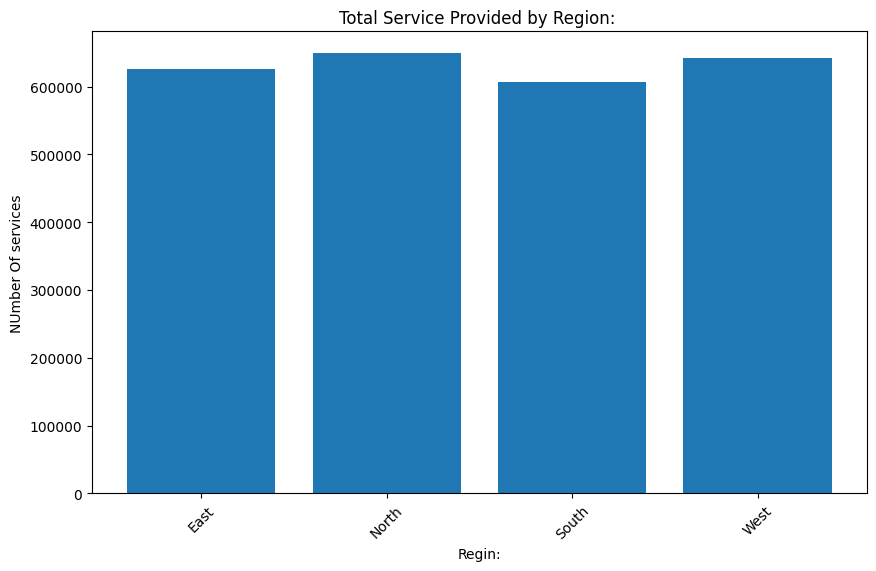

In [63]:
plt.figure(figsize=(10,6))
plt.bar(cost_grp_area.index, cost_grp_area.values)
plt.title("Total Service Provided by Region: ")
plt.xlabel("Regin:")
plt.ylabel("NUmber Of services")
plt.xticks(rotation = 45)
plt.savefig("total_services__by_region.png")
plt.show()

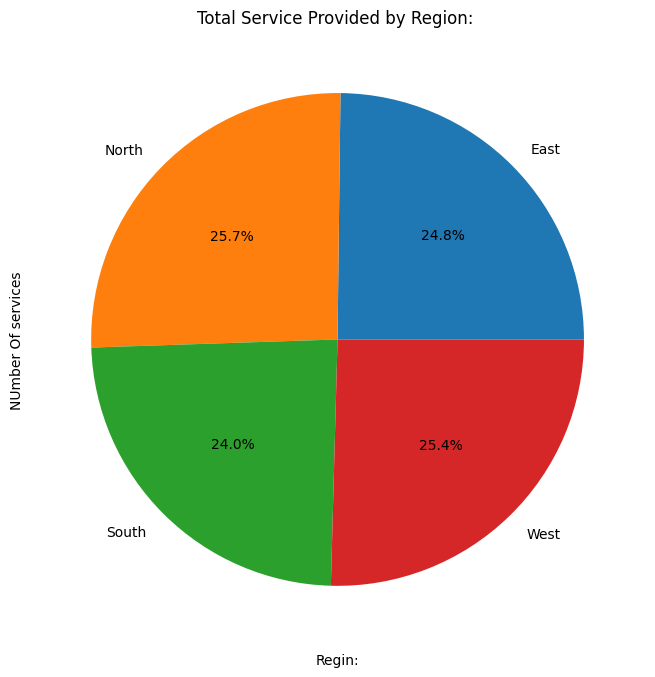

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(
    cost_grp_area.values,
    labels=cost_grp_area.index,
    autopct='%1.1f%%',
    # explode=[0.1 if i == cost_grp_area.values.argmax() else 0 for i in range(len(cost_grp_area))],  # Highlight the largest slice
)
plt.title("Total Service Provided by Region: ")
plt.xlabel("Regin:")
plt.ylabel("NUmber Of services")
plt.xticks(rotation = 45)
plt.savefig("total_services__by_region_Pie_Chart.png")
plt.show()


In [ ]:
avg_price_per_type  = df.groupby('Customer_Type')['Price'].sum()
plt.figure(figsize=(10,6))
plt.bar(avg_price_per_type.index, avg_price_per_type.values)
plt.title("Total Service Provided by Region: ")
plt.xlabel("Regin:")
plt.ylabel("NUmber Of services")
plt.xticks(rotation = 45)
plt.savefig("total_services__by_region.png")
plt.show()

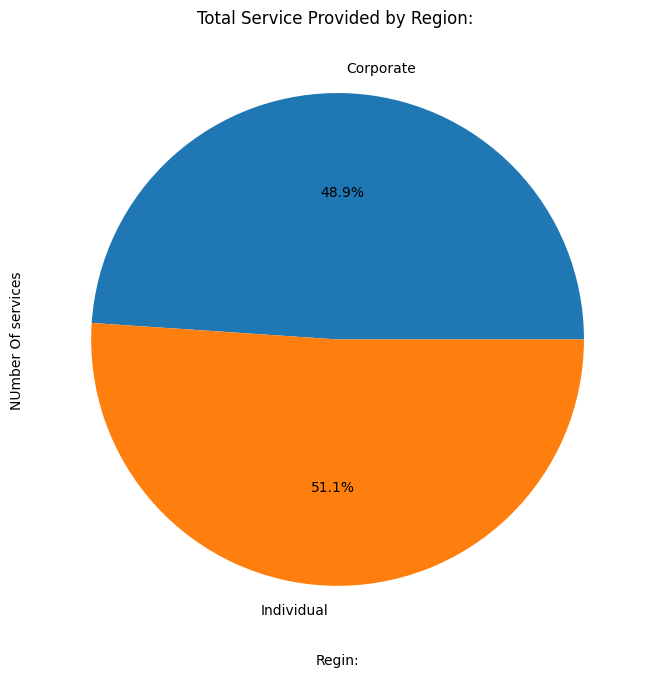

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(
    avg_price_per_type,
    labels=avg_price_per_type.index,
    autopct='%1.1f%%',
    )
plt.title("Total Service Provided by Region: ")
plt.xlabel("Regin:")
plt.ylabel("NUmber Of services")
plt.xticks(rotation = 45)
plt.savefig("total_services__by_region.png")
plt.show()

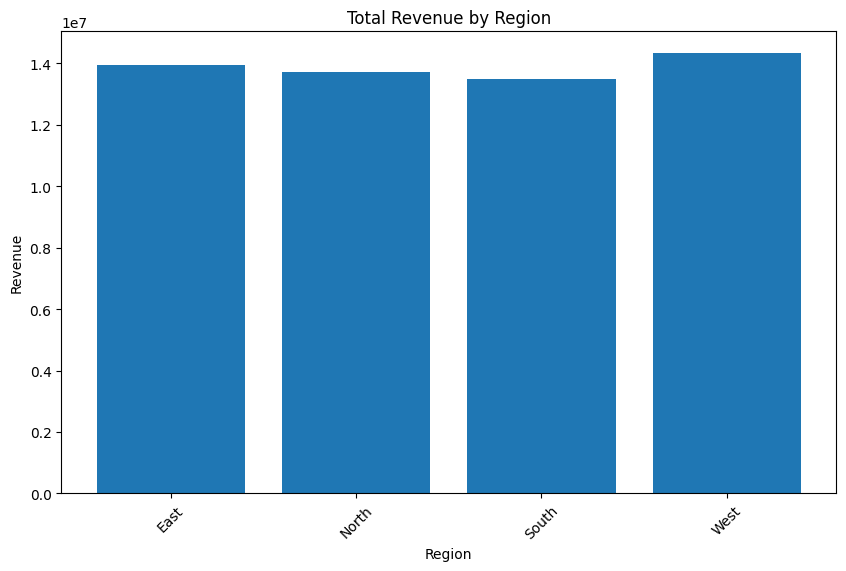

In [82]:
revenue_of_region_grp = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(10, 6))
# Use revenue_of_region_grp.index as the x-axis labels
plt.bar(revenue_of_region_grp.index, revenue_of_region_grp.values)
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.savefig("revenue_grp.png")
plt.show()


In [83]:
with open('analysis_output.txt','a') as f:
  f.writelines(output)